In [1]:
# import Library and some random image data set
import tensorflow as tf
import numpy      as np
import seaborn    as sns 
import pandas     as pd
import os
import matplotlib.pyplot as plt
np.random.seed(78); tf.set_random_seed(78)

# get some of the STL data set
# Get the certain STL 10 Data
from skimage import util 
from skimage.transform import resize
from skimage.io import imread
import warnings
warnings.filterwarnings("ignore")

def showimages(x,coloums=30,row=3,col=False):
    fig=plt.figure(figsize=(30, 3))
    columns = coloums; rows = row
    for i in range(1, columns*rows +1):
        fig.add_subplot(rows, columns, i)
        if col: plt.imshow(np.squeeze(x[i-1]))
        else:   plt.imshow(np.squeeze(x[i-1]),cmap='gray')
        plt.tick_params(axis='both', left=False, top=False, right=False, bottom=False, labelleft=False, labeltop=False, labelright=False, labelbottom=False)
        plt.grid(False)
    plt.show()

data_location = "../../Dataset/STL10/img/10/"
train_data = []  # create an empty list
for dirName, subdirList, fileList in sorted(os.walk(data_location)):
    for filename in fileList:
        if ".png" in filename.lower() :
            train_data.append(os.path.join(dirName,filename))

image_resize_px = 64
train_batch = np.zeros(shape=(len(train_data),image_resize_px,image_resize_px,3))
for file_index in range(len(train_data)):
    train_batch[file_index] = resize(imread(train_data[file_index]),(image_resize_px,image_resize_px))

# print out the data shape and the max and min value
print('Train batch, min, max : ',train_batch.shape,train_batch.min((0,1,2)),train_batch.max((0,1,2)))
train_batch1 = train_batch.copy()

data_location = "../../Dataset/STL10/img/2/"
train_data = []  # create an empty list
for dirName, subdirList, fileList in sorted(os.walk(data_location)):
    for filename in fileList:
        if ".png" in filename.lower() :
            train_data.append(os.path.join(dirName,filename))

image_resize_px = 64
train_batch = np.zeros(shape=(len(train_data),image_resize_px,image_resize_px,3))
for file_index in range(len(train_data)):
    train_batch[file_index] = resize(imread(train_data[file_index]),(image_resize_px,image_resize_px))

# print out the data shape and the max and min value
print('Train batch, min, max : ',train_batch.shape,train_batch.min((0,1,2)),train_batch.max((0,1,2)))
train_batch2 = train_batch.copy()

data_location = "../../Dataset/STL10/img/3/"
train_data = []  # create an empty list
for dirName, subdirList, fileList in sorted(os.walk(data_location)):
    for filename in fileList:
        if ".png" in filename.lower() :
            train_data.append(os.path.join(dirName,filename))

image_resize_px = 64
train_batch = np.zeros(shape=(len(train_data),image_resize_px,image_resize_px,3))
for file_index in range(len(train_data)):
    train_batch[file_index] = resize(imread(train_data[file_index]),(image_resize_px,image_resize_px))

# print out the data shape and the max and min value
print('Train batch, min, max : ',train_batch.shape,train_batch.min((0,1,2)),train_batch.max((0,1,2)))
train_batch3 = train_batch.copy()

Train batch, min, max :  (500, 64, 64, 3) [0. 0. 0.] [1. 1. 1.]
Train batch, min, max :  (500, 64, 64, 3) [0. 0. 0.] [1. 1. 1.]
Train batch, min, max :  (500, 64, 64, 3) [0. 0. 0.] [1. 1. 1.]


(1500, 64, 64, 3)


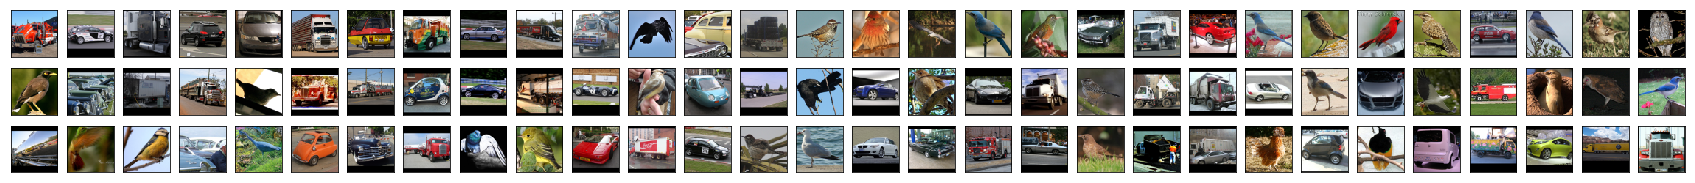

In [2]:
# show the random images
from sklearn.utils import shuffle
train_batch_final = np.vstack((train_batch1,train_batch2,train_batch3))
print(train_batch_final.shape)
showimages(shuffle(train_batch_final))

In [3]:
def tf_iden(x):  return x
def d_tf_iden(x):return 1.0

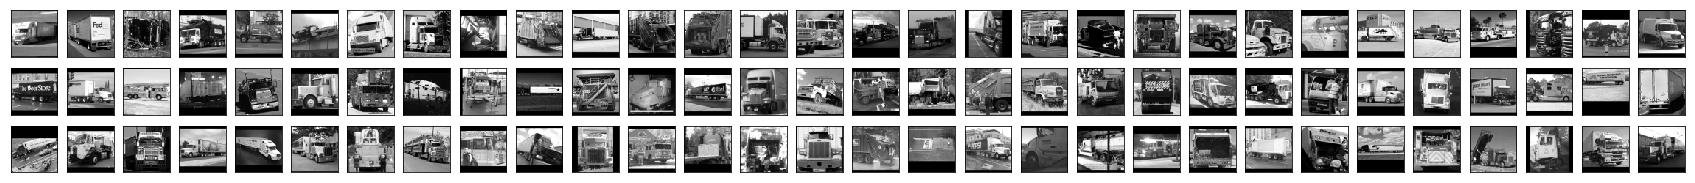

Before Mean Layer :  2572.164464613971
After  Mean Layer :  4.883246584874712e-16
Data    Mean :  0.40190069759593294
Updated Mean :  0.04019006975959329


In [48]:
# test out the mean layer (reset the graph)
tf.reset_default_graph()
class tf_mean_layer():
    
    def __init__(self,vector_shape):
        self.moving_mean = tf.Variable(tf.zeros(shape=[vector_shape,1],dtype=tf.float64))
        
    def feedforward(self,input,training_phase=True):
        self.input = input
        

        # Training Moving Average Mean         
        def training_fn():
            using_mean         = tf.reduce_mean(input,axis=-1)[:,None]
            centered_data      = self.input - using_mean
            return centered_data,tf.assign( self.moving_mean,self.moving_mean*0.9 + 0.1 * using_mean )
        
        # Testing Moving Average Mean        
        def  testing_fn():
            centered_data      = self.input - self.moving_mean
            return centered_data,tf.assign(self.moving_mean,self.moving_mean)
        
        self.output,update_mean = tf.cond(training_phase,true_fn=training_fn,false_fn=testing_fn)
        return self.output,update_mean
    
    def backprop(self,grad):
        pass
    
# make the place holder and start the session
x     = tf.placeholder(shape=(100,64*64),dtype=tf.float64)
phase = tf.placeholder(shape=[],dtype=tf.bool)

mean_layer             = tf_mean_layer(100)
mean_data,update_mean  = mean_layer.feedforward(x,training_phase=phase)

sess = tf.InteractiveSession();  sess.run(tf.global_variables_initializer())
mean_result,mean_update = sess.run([mean_data,update_mean],feed_dict={x:train_batch_final[:100,:,:,0].reshape((100,-1)),phase:True })
showimages(mean_result.reshape((100,64,64)),col=False)
print('Before Mean Layer : ',train_batch_final[:100,:,:,0].mean(-1).sum());  print('After  Mean Layer : ',mean_result.mean(-1).sum())
print('Data    Mean : ',   train_batch_final[:100,:,:,0].mean());            print('Updated Mean : ',   mean_update.mean())

In [7]:
class global_contrast_layer():
    
    def __init__(self):
        self.moving_mean = None
        pass
    
    def feedforward(self,input):
        self.input      = input
        self.image_mean =
        
        
    def backprop(self,grad):
        pass

In [8]:
gcl = global_contrast_layer()

In [ ]:
sess = tf.

In [ ]:
# Modified code from: https://datascience.stackexchange.com/questions/15110/how-to-implement-global-contrast-normalization-in-python
def global_contrast_normalization(image, 1e-5):
    X = numpy.array(Image.open(filename))

    # replacement for the loop
    X_average = numpy.mean(X)
    print('Mean: ', X_average)
    X = X - X_average

    # `su` is here the mean, instead of the sum
    contrast = numpy.sqrt(lmda + numpy.mean(X**2))

    X = s * X / max(contrast, epsilon)

    # scipy can handle it
    scipy.misc.imsave('result.jpg', X)

In [3]:
! git all-go

On branch master
Your branch is up to date with 'origin/master'.

nothing to commit, working tree clean
